# Introduction to Word Embeddings and Language Models

_R Version_ for Google Collab

<div>
<img src="https://github.com/ubcecon/ai-workshop/blob/main/media/word_embedding_cover_art.png?raw=1" width="1000"/>
</div>

_This notebook was prepared by Laura Nelson in collaboration with [UBC COMET](https://comet.arts.ubc.ca/) team members: Jonathan Graves, Angela Chen and Anneke Dresselhuis_

## Prerequisites

1. Some familiarity programming in R
2. Some familarity with natural language processing
3. No computational text experience necessary!

## Learning outcomes

In the notebook you will

1. Familiarize yourself with concepts such as word embeddings (WE) vector-space model of language, natural language processing (NLP) and how they relate to small and large language models (LMs)
1. Import and pre-process a textual dataset for use in word embedding
1. Use word2vec to build a simple language model for examining patterns and biases textual datasets
1. Identify and select methods for saving and loading models
1. Use critical and reflexive thinking to gain a deeper understanding of how the inherent social and cultural biases of language are reproduced and mapped into language computation models

## Outline

The goal of this notebook is to demystify some of the technical aspects of language models and to invite learners to start thinking about how these important tools function in society.

In particular, this lesson is designed to explore features of word embeddings produced through the word2vec model. The questions we ask in this lesson are guided by Ben Schmidt's blog post, [Rejecting the Gender Binary]("http://bookworm.benschmidt.org/posts/2015-10-30-rejecting-the-gender-binary.html).

The primary corpus we will use consists of the <a href="http://txtlab.org/?p=601">150 English-language novels</a> made available by the <em>.txtLab</em> at McGill University. We also look at a <a href="http://ryanheuser.org/word-vectors-1/">Word2Vec model trained on the ECCO-TCP corpus</a> of 2,350 eighteenth-century literary texts made available by Ryan Heuser. (Note that the number of terms in the model has been shortened by half in order to conserve memory.)

## Key Terms
Before we dive in, feel free to familiarize yourself with the following key terms and how they relate to each other.
</div>
<img src="https://github.com/ubcecon/ai-workshop/blob/main/media/ai_key_terms.png?raw=1" width="500"/>
</div>

**Artificial Intelligence (AI):** this term is a broad category that includes the study and development of computer systems that can copy intelligent human behaviour (adapted from [_Oxford Learners Dictionary_](https://www.oxfordlearnersdictionaries.com/definition/english/ai#:~:text=%2F%CB%8Ce%C9%AA%20%CB%88a%C9%AA%2F-,%2F%CB%8Ce%C9%AA%20%CB%88a%C9%AA%2F,way%20a%20human%20brain%20does.))

**Machine Learning (ML):** this is branch of AI which is uses statistical methods to imitate the way that humans learn (adapted from [_IBM_](https://www.ibm.com/topics/machine-learning))

**Natural Language Processing (NLP):** this is branch of AI which focuses on training computers to interpret human text and spoken words (adapted from [_IBM_](https://www.ibm.com/topics/natural-language-processing#:~:text=the%20next%20step-,What%20is%20natural%20language%20processing%3F,same%20way%20human%20beings%20can.))

**Word Embeddings (WE):** this is an NLP process through which human words are converted into numerical representations (usually vectors) in order for computers to be able to understand them (adapted from [_Turing_](https://www.turing.com/kb/guide-on-word-embeddings-in-nlp))

**word2vec:** this is an NLP technique that is commonly used to generate word embeddings




## What are Word Embeddings?

Building off of the definition above, word embeddings are one way that humans can represent language in a way that is legible to a machine. More specifically, they are an NLP approach that use vectors to store textual data in multiple dimensions; by existing in the multi-dimensional space of vectors, word embeddings are able to include important semantic information within a given numeric representation.

For example, if we are trying to answer a research question about how popular a term is on the web at a given time, we might use a simple word frequency analysis to count how many times the word "candidate" shows up in tweets during a defined electoral period. However, if we wanted to gain a more nuanced understanding of what kind of language, biases or attitudes contextualize the term, "candidate" in discourse, we would need to use a method like word embedding to encode meaning into our understanding of how people have talked about candidates over time. Instead of describing our text as a series of word counts, we would treat our text like coordinates in space, where similar words and concepts are closer to each other, and words that are different from each other are further away.

![Comparing word frequency count and word embedding methods](https://github.com/ubcecon/ai-workshop/blob/main/media/word_frequency_vs_word_embeddings.png?raw=1)


For example, in the visualization above, a word frequency count returns the number of times the word "candidate" or "candidates" is used in a sample text corpus. When a word embedding is made from the same text corpus, we are able to map related concepts and phrases that are closely related to "candidate" as neighbours, while other words and phrases such as "experimental study" (which refers to the research paper in question, and not to candidates specifically) are further away.

Here is another example of how different, but related words might be represented in a word embedding:
<img src = "media/w2v-Analogies.png">

## Making a Word Embedding
So, how do word embeddings work? To make a word embedding, an input word gets compressed into a dense vector.

![Creating a word embedding vector](https://github.com/ubcecon/ai-workshop/blob/main/media/creating_a_word_embedding.png?raw=1)

The magic and mystery of the word embedding process is that often the vectors produced during the model embed qualities of a word or phrase that are not interpretable by humans. However, for our purposes, having the text in vector format is all we need. With this format, we can perform tests like cosine similarity and other kinds of operations. Such operations can reveal many different kinds of relationships between words, as we'll examine a bit later.

## Using word2vec

Word2vec is one NLP technique that is commonly used to generate word embeddings. More precisely, word2vec is an algorithmic learning tool rather than a specific neural net that is already trained. The example we will be working through today has been made using this tool.

The series of algorithms inside of the word2vec model try to describe and acquire parameters for a given word in terms of the text that appear immediately to the right and left in actual sentences. Essentially, it learns how to predict text.

Without going too deep into the algorithm, suffice it to say that it involves a two-step process:

1. First, the input word gets compressed into a dense vector, as seen in the simplified diagram, "Creating a Word Embedding," above.
2. Second, the vector gets decoded into the set of context words. Keywords that appear within similar contexts will have similar vector representations in between steps.

Imagine that each word in a novel has its meaning determined by the ones that surround it in a limited window. For example, in Moby Dick's first sentence, “me” is paired on either side by “Call” and “Ishmael.” After observing the windows around every word in the novel (or many novels), the computer will notice a pattern in which “me” falls between similar pairs of words to “her,” “him,” or “them.” Of course, the computer had gone through a similar process over the words “Call” and “Ishmael,” for which “me” is reciprocally part of their contexts. This chaining of signifiers to one another mirrors some of humanists' most sophisticated interpretative frameworks of language.

The two main model architectures of word2vec are **Continuous Bag of Words (CBOW)** and **Skip-Gram**, which can be distinguished partly by their input and output during training.

**CBOW** takes the context words (for example, "Call","Ishmael") as a single input and tries to predict the word of interest ("me").

<div>
<img src="https://github.com/ubcecon/ai-workshop/blob/main/media/CBOW.gif?raw=1" width="500"/>
</div>

**Skip-Gram** does the opposite, taking a word of interest as its input (for example, "me") and tries to learn how to predict its context words ("Call","Ishmael").

<div>
<img src="https://github.com/ubcecon/ai-workshop/blob/main/media/SG.gif?raw=1" width="500"/>
</div>

In general, CBOW is is faster and does well with frequent words, while Skip-Gram potentially represents rare words better.

Since the word embedding is a vector, we are able perform tests like cosine similarity (which we'll learn more about in a bit!) and other kinds of operations. Those operations can reveal many different kinds of relationships between words, as we shall see.

## Bias and Language Models

You might already be piecing together that the encoding of meaning in word embeddings is entirely shaped by patterns of language use captured in the training data. That is, what is included in a word embedding directly reflects the complex social and cultural biases of everyday human language - in fact, exploring how these biases function and change over time (as we will do later) is one of the most interesting ways to use word embeddings in social research.

#### It is simply impossible to have a bias-free language model (LM).

In LMs, bias is not a bug or a glitch, rather, it is an essential feature that is baked into the fundamental structure. For example, LMs are not outside of learning and absorbing the pejorative dimensions of language which in turn, can result in reproducing harmful correlations of meaning for words about race, class or gender (among others). When unchecked, these harms can be “amplified in downstream applications of word embeddings” ([Arseniev-Koehler & Foster, 2020, p. 1](https://osf.io/preprints/socarxiv/b8kud/)).

Just like any other computational model, it is important to critically engage with the source and context of the training data. One way that [Schiffers, Kern and Hienert](https://arxiv.org/abs/2302.06174v1) suggest doing this is by using domain specific models (2023). Working with models that understand the nuances of your particular topic or field can better account for "specialized vocabulary and semantic relationships" that can help make applications of WE more effective.

## Preparing for our Analysis

#### Word2vec Features

**Here are a few features of the word2vec tool that we can use to customize our analysis:**

* `size`: Number of dimensions for word embedding model</li>
* `window`: Number of context words to observe in each direction</li>
* `min_count`: Minimum frequency for words included in model</li>
* `sg` (Skip-Gram): '0' indicates CBOW model; '1' indicates Skip-Gram</li>
* `alpha`: Learning rate (initial); prevents model from over-correcting, enables finer tuning</li>
* `iterations`: Number of passes through dataset</li>
* `batch size`: Number of words to sample from data during each pass</li>

Note: the script uses default value for each argument.

**Some limitations of the word2vec Model**

* Within word2vec, common articles or conjunctions, called **stop words** such as "the" and "and," may not provide very rich contextual information for a given word, and may need additional subsampling or to be combined into a word phrase (Anwla, 2019).
* Word2vec isn't always the best at handling out-of-vocabulary words well (Chandran, 2021).

Let's begin our analysis!

## Exercise #1: Eggs, Sausages and Bacon
<div>
<img src="https://github.com/ubcecon/ai-workshop/blob/main/media/eggs_bacon_sausages.png?raw=1" width="750"/>
<div>

To begin, we are going to install and load a few packages that are necessary for our analysis. Run the code cells below if these packages are not already installed:

In [1]:
# uncomment these by deleting the "#" to install them

install.packages("tidyverse")
install.packages("repr")
install.packages("proxy")
install.packages("scales")
install.packages("tm")
install.packages("MASS")
install.packages("SentimentAnalysis")
install.packages("reticulate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘Rcpp’, ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘tau’, ‘foreach’, ‘shape’, ‘RcppEigen’, ‘lars’, ‘randomForest’, ‘qdapDictionaries’, ‘ngramrr’, ‘moments’, ‘stringdist’, ‘glmnet’, ‘spikeslab’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’




In [2]:
# Load the required libraries
library(tidyverse)
library(repr)
library(proxy)
library(tm)
library(scales)
library(MASS)

system("wget https://github.com/ubcecon/ai-workshop/archive/refs/tags/0.5.zip")
system("unzip 0.5.zip")
system("mkdir media && mkdir resources && mkdir txtlab_Novel450_English")
system("mv ai-workshop-0.5/media . && mv ai-workshop-0.5/resources . && mv ai-workshop-0.5/txtlab_Novel450_English .")

# Set up figures to save properly
options(jupyter.plot_mimetypes = "image/png")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘proxy’


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix


Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor





In [3]:
# Time: 30s
library(reticulate)
gensim <- import("gensim")


#### Create a Document-Term Matrix (DTM) with a Few Pseudo-Texts
To start off, we're going to create a mini dataframe based on the use of the words "eggs," "sausages" and "bacon" found in three different novels: A, B and C.


In [4]:
# Construct dataframe
columns <- c('eggs', 'sausage', 'bacon')
indices <- c('Novel A', 'Novel B', 'Novel C')
dtm <- data.frame(eggs = c(50, 90, 20),
                  sausage = c(60, 10, 70),
                  bacon = c(60, 10, 70),
                  row.names = indices)

# Show dataframe
print(dtm)


        eggs sausage bacon
Novel A   50      60    60
Novel B   90      10    10
Novel C   20      70    70


#### Visualize

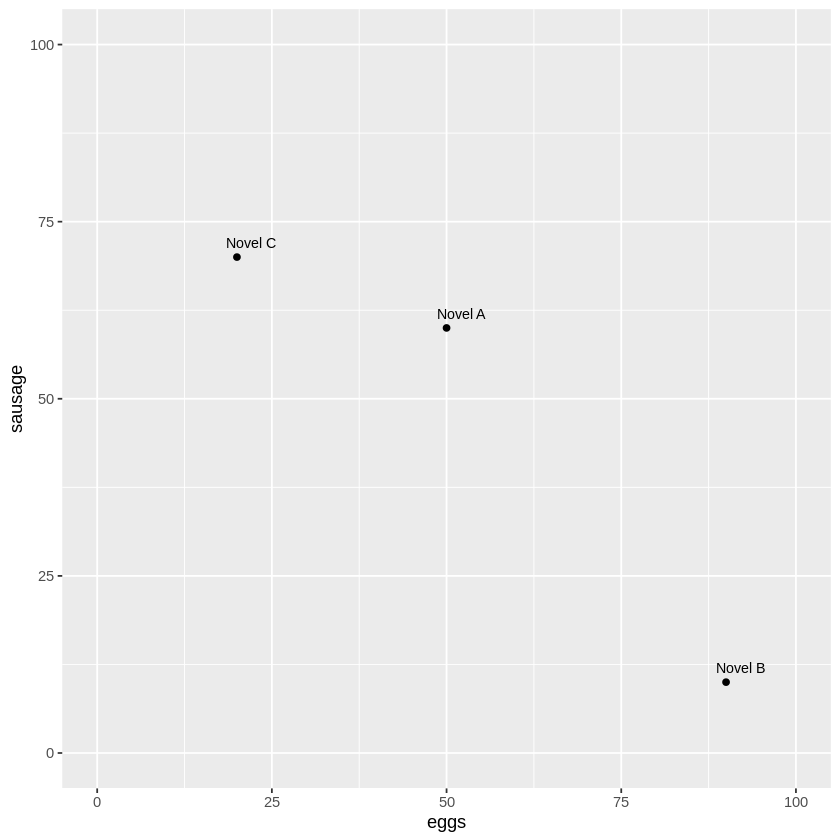

In [5]:
# Then, we'll create the scatter plot of our data using ggplot2
ggplot(dtm, aes(x = eggs, y = sausage)) +
  geom_point() +
  geom_text(aes(label = rownames(dtm)), nudge_x = 2, nudge_y = 2, size = 3) +
  xlim(0, 100) +
  ylim(0, 100) +
  labs(x = "eggs", y = "sausage")

### Vectors

At a glance, a couple of points are lying closer to one another. We used the word frequencies of just two words in order to plot our texts in a two-dimensional plane. The term frequency "summaries" of <i>Novel A</i> & <i>Novel C</i> are pretty similar to one another: they both share a major concern with "sausage", whereas <i>Novel B</i> seems to focus primarily on "eggs."

This raises a question: how can we operationalize our intuition that spatial distance expresses topical similarity?

## Cosine Similarity
The most common measurement of distance between points is their [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity). Cosine similarity can operate on textual data that contain word vectors and allows us to identify how similar documents are to each other, for example. Cosine Similarity thus helps us understand how much content overlap a set of documents have with one another. For example, imagine that we were to draw an arrow from the origin of the graph - point (0,0) - to the dot representing each text. This arrow is called a _vector_.

Mathematically, this can be represented as:
<div>
<img src='https://github.com/ubcecon/ai-workshop/blob/main/media/Dot-Product.png?raw=1' >

Using our example above, we can see that the angle from (0,0) between Novel C and Novel A (orange triangle) is smaller than between Novel A and Novel B (navy triangle) or between Novel C and Novel B (both triangles together).
<div>
<img src="https://github.com/ubcecon/ai-workshop/blob/main/media/annotated_scatterplot.png?raw=1" width="400"/>
<div>

Because this similarity measurement uses the cosine of the angle between vectors, the magnitude is not a matter of concern (this feature is really helpful for text vectors that can often be really long!). Instead, the output of cosine similarity yields a value between 0 and 1 (we don't have to work with something confusing like 18º!) that can be easily interpreted and compared - and thus we can also avoid the troubles associated with other dimensional distance measures such as [Euclidean Distance](https://en.wikipedia.org/wiki/Euclidean_distance).

### Calculating Cosine Distance

In [6]:
# Assuming dtm_df is a data frame containing the document-term matrix
dtm_matrix <- as.matrix(dtm)

# Calculate cosine similarity
cos_sim <- proxy::dist(dtm_matrix, method = "cosine")


# Although we want the Cosine Distance, it is mathematically simpler to calculate its opposite: Cosine Similarity
# The formula for Cosine Distance is = 1 - Cosine Similarity

# Convert the cosine similarity matrix to a 2-dimensional array
# So we will subtract the similarities from 1
n <- nrow(dtm_matrix)
cos_sim_array <- matrix(1 - as.vector(as.matrix(cos_sim)), n, n)

# Print the result
print(cos_sim_array)

          [,1]      [,2]     [,3]
[1,] 1.0000000 0.6352577 0.945022
[2,] 0.6352577 1.0000000 0.347785
[3,] 0.9450220 0.3477850 1.000000


In [7]:
# Make it a little easier to read by rounding the values
cos_sim_rounded <- round(cos_sim_array, 2)

# Label the dataframe rows and columns with eggs, sausage and bacon
cos_df <- data.frame(cos_sim_rounded, row.names = indices, check.names = FALSE)
colnames(cos_df) <- indices

# Print the data frame
head(cos_df)

,Novel A,Novel B,Novel C
,<dbl>,<dbl>,<dbl>
Novel A,1.00,0.64,0.95
Novel B,0.64,1.00,0.35
Novel C,0.95,0.35,1.00


## Exercise #2: Working with 18th Century Literature

<div>
<img src="https://github.com/ubcecon/ai-workshop/blob/main/media/18th_cent_literature.png?raw=1" width="750"/>
<div>

<font color="blue" size=12>Workshop Run Here at Start</font>

In [8]:
# Load the required libraries
library(tidyverse)
library(repr)
library(proxy)
library(tm)
library(scales)
library(MASS)


# Set up figures to save properly
options(jupyter.plot_mimetypes = "image/png")

# Time: 3 mins
# File paths and names
filelist <- c(
  'txtlab_Novel450_English/EN_1850_Hawthorne,Nathaniel_TheScarletLetter_Novel.txt',
  'txtlab_Novel450_English/EN_1851_Hawthorne,Nathaniel_TheHouseoftheSevenGables_Novel.txt',
  'txtlab_Novel450_English/EN_1920_Fitzgerald,FScott_ThisSideofParadise_Novel.txt',
  'txtlab_Novel450_English/EN_1922_Fitzgerald,FScott_TheBeautifulandtheDamned_Novel.txt',
  'txtlab_Novel450_English/EN_1811_Austen,Jane_SenseandSensibility_Novel.txt',
  'txtlab_Novel450_English/EN_1813_Austen,Jane_PrideandPrejudice_Novel.txt'
)

novel_names <- c(
  'Hawthorne: Scarlet Letter',
  'Hawthorne: Seven Gables',
  'Fitzgerald: This Side of Paradise',
  'Fitzgerald: Beautiful and the Damned',
  'Austen: Sense and Sensibility',
  'Austen: Pride and Prejudice'
)

# Function to read non-empty lines from the text file
readNonEmptyLines <- function(filepath) {
  lines <- readLines(filepath, encoding = "UTF-8")
  non_empty_lines <- lines[trimws(lines) != ""]
  return(paste(non_empty_lines, collapse = " "))
}

# Read non-empty texts into a corpus
text_corpus <- VCorpus(VectorSource(sapply(filelist, readNonEmptyLines)))

# Preprocess the text data
text_corpus <- tm_map(text_corpus, content_transformer(tolower))
text_corpus <- tm_map(text_corpus, removePunctuation)
text_corpus <- tm_map(text_corpus, removeNumbers)
text_corpus <- tm_map(text_corpus, removeWords, stopwords("english"))
text_corpus <- tm_map(text_corpus, stripWhitespace)

## Time: 5 mins
# Create a custom control for DTM with binary term frequency
custom_control <- list(
  tokenize = function(x) SentimentAnalysis::ngram_tokenize(x, ngmax = 1),
  bounds = list(global = c(3, Inf)),
  weighting = weightTf
)

# Convert the corpus to a DTM using custom control
dtm <- DocumentTermMatrix(text_corpus, control = custom_control)

# Convert DTM to a binary data frame (0 or 1)
dtm_df_novel <- as.data.frame(as.matrix(dtm > 0))
colnames(dtm_df_novel) <- colnames(dtm)

# Set row names to novel names
rownames(dtm_df_novel) <- novel_names

# Print the resulting data frame
tail(dtm_df_novel)

Warning message in readLines(filepath, encoding = "UTF-8"):
“incomplete final line found on 'txtlab_Novel450_English/EN_1920_Fitzgerald,FScott_ThisSideofParadise_Novel.txt'”


,—can,—ever,—every,—except,—ill,—just,—let,—like,—may,—nay,⋯,youll,young,younger,youngest,youre,youth,youthful,youths,youve,zeal
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
Hawthorne: Scarlet Letter,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,⋯,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
Hawthorne: Seven Gables,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE
Fitzgerald: This Side of Paradise,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
Fitzgerald: Beautiful and the Damned,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE
Austen: Sense and Sensibility,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,⋯,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
Austen: Pride and Prejudice,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,⋯,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE


In [ ]:
# Just as we did above with the small data frame, we'll find the cosine similarity for these texts
cos_sim_novel <- as.matrix(proxy::dist(dtm_df_novel, method = "cosine"))

# Convert the cosine similarity matrix to a 2-dimensional array
n <- nrow(dtm_df_novel)
cos_sim_array <- matrix(1 - as.vector(as.matrix(cos_sim_novel)), n, n)

# Round the cosine similarity matrix to two decimal places
cos_sim_novel_rounded <- round(cos_sim_array, 2)

# Print the rounded cosine similarity matrix
print(cos_sim_novel_rounded)

     [,1] [,2] [,3] [,4] [,5] [,6]
[1,] 1.00 0.80 0.69 0.75 0.68 0.67
[2,] 0.80 1.00 0.74 0.80 0.71 0.70
[3,] 0.69 0.74 1.00 0.79 0.63 0.62
[4,] 0.75 0.80 0.79 1.00 0.70 0.69
[5,] 0.68 0.71 0.63 0.70 1.00 0.81
[6,] 0.67 0.70 0.62 0.69 0.81 1.00


In [ ]:
# Again, we'll make this a bit more readable
cos_df <- data.frame(cos_sim_novel_rounded, row.names = novel_names, check.names = FALSE)

# Set column names to novel names
colnames(cos_df) <- novel_names

# Print the DataFrame
head(cos_df)

,Hawthorne: Scarlet Letter,Hawthorne: Seven Gables,Fitzgerald: This Side of Paradise,Fitzgerald: Beautiful and the Damned,Austen: Sense and Sensibility,Austen: Pride and Prejudice
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hawthorne: Scarlet Letter,1.00,0.80,0.69,0.75,0.68,0.67
Hawthorne: Seven Gables,0.80,1.00,0.74,0.80,0.71,0.70
Fitzgerald: This Side of Paradise,0.69,0.74,1.00,0.79,0.63,0.62
Fitzgerald: Beautiful and the Damned,0.75,0.80,0.79,1.00,0.70,0.69
Austen: Sense and Sensibility,0.68,0.71,0.63,0.70,1.00,0.81
Austen: Pride and Prejudice,0.67,0.70,0.62,0.69,0.81,1.00


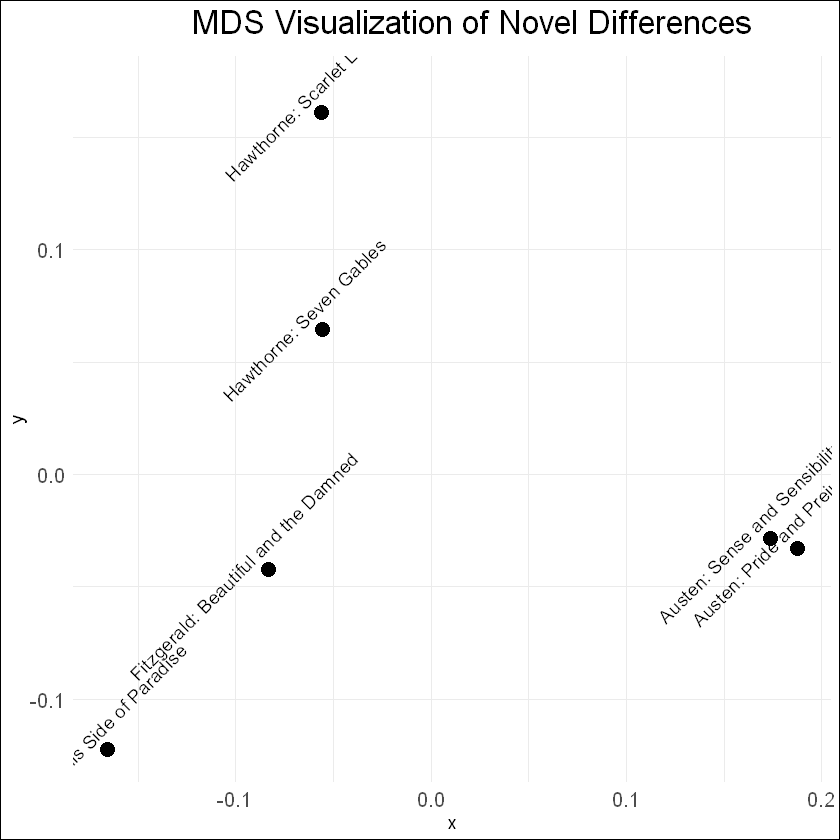

In [ ]:
# Transform cosine similarity to cosine distance
cos_dist <- 1 - cos_sim_novel_rounded

# Perform MDS
mds <- cmdscale(cos_dist, k = 2)

# Extract x and y coordinates from MDS output
xs <- mds[, 1]
ys <- mds[, 2]

# Create a data frame with x, y coordinates, and novel names
mds_df <- data.frame(x = xs, y = ys, novel_names = novel_names)

ggplot(mds_df, aes(x, y, label = novel_names)) +
  geom_point(size = 4) +
  geom_text(hjust =0.6, vjust = 0.2, size = 4, angle = 45, nudge_y = 0.01) +  # Rotate text and adjust y position
  labs(title = "MDS Visualization of Novel Differences") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, hjust = 0.6, margin = margin(b = 10)),
    plot.margin = margin(5, 5, 5, 5, "pt"),  # Adjust the margin around the plot
    plot.background = element_rect(fill = "white"),  # Set the background color of the plot to white
    plot.caption = element_blank(),  # Remove the default caption
    axis.text = element_text(size = 12),  # Adjust the size of axis text
    legend.text = element_text(size = 12),  # Adjust the size of legend text
    legend.title = element_text(size = 14)  # Adjust the size of legend title
  )

The above method has a broad range of applications, such as unsupervised clustering. Common techniques include <a href = "https://en.wikipedia.org/wiki/K-means_clustering">K-Means Clustering</a> and <a href="https://en.wikipedia.org/wiki/Hierarchical_clustering">Hierarchical Dendrograms</a>. These attempt to identify groups of texts with shared content, based on these kinds of distance measures.

Here's an example of a dendrogram based on these six novels:

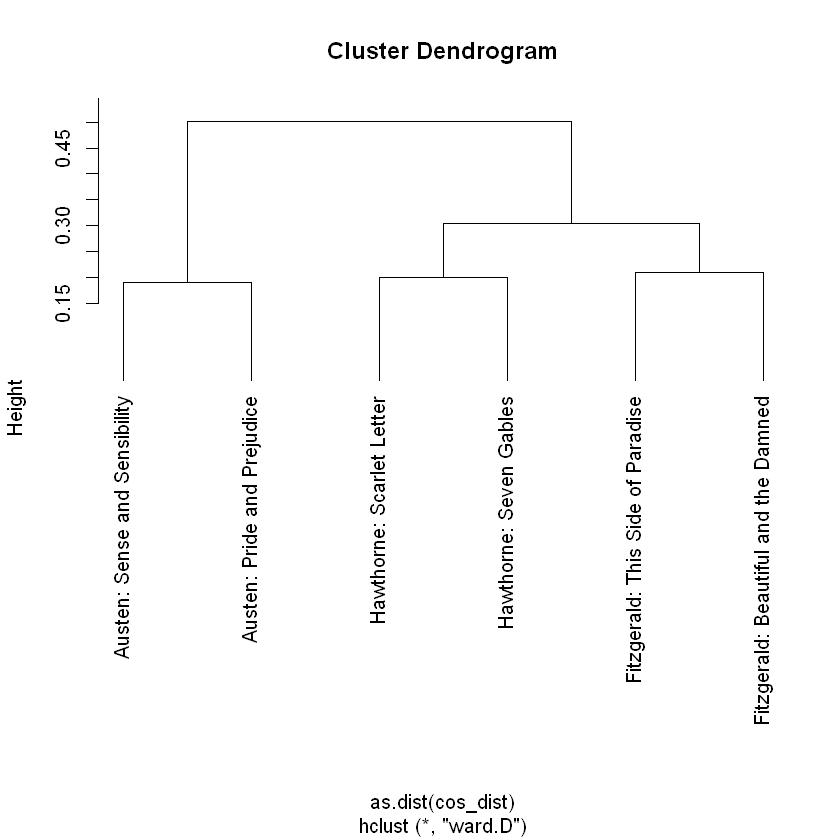

In [ ]:
# Assuming you have already calculated the "cos_dist" matrix and have the "novel_names" vector

# Perform hierarchical clustering
hclust_result <- hclust(as.dist(cos_dist), method = "ward.D")

# Plot the dendrogram
plot(hclust_result, hang = -1, labels = novel_names)

# Optional: Adjust the layout to avoid cutoff labels
par(mar = c(5, 4, 2, 10))  # Adjust margins

# Display the dendrogram plot


#### Vector Semantics

We can also turn this logic on its head. Rather than produce vectors representing texts based on their words, we will produce vectors for the words based on their contexts.

In [ ]:
# Transpose the DTM data frame
transposed_dtm <- t(dtm_df_novel)

# Display the first few rows of the transposed DTM
tail(transposed_dtm)


,Hawthorne: Scarlet Letter,Hawthorne: Seven Gables,Fitzgerald: This Side of Paradise,Fitzgerald: Beautiful and the Damned,Austen: Sense and Sensibility,Austen: Pride and Prejudice
youre,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE
youth,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
youthful,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE
youths,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE
youve,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE
zeal,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE


Because the number of words is so large, for memory reasons we're going to work with just the last few, pictured above.  

* If you are running this locally, you may want to try this with more words

In [ ]:
# Assuming dtm_df is a data frame containing the document-term matrix
tail_transposed_dtm <- tail(transposed_dtm)

dtm_matrix <- as.matrix(tail_transposed_dtm) #remove 'tail_' to use all words

# Calculate cosine similarity
cos_sim_words <- proxy::dist(dtm_matrix, method = "cosine")

# Convert the cosine similarity matrix to a 2-dimensional array
n <- nrow(dtm_matrix)
cos_sim_words <- matrix(1 - as.vector(as.matrix(cos_sim_words)), n, n)

# Print the result
head(cos_sim_words)


1.0000000,0.7071068,0.5773503,0.6666667,1.0000000,0.3333333
0.7071068,1.0000000,0.8164966,0.7071068,0.7071068,0.7071068
0.5773503,0.8164966,1.0000000,0.2886751,0.5773503,0.8660254
0.6666667,0.7071068,0.2886751,1.0000000,0.6666667,0.0000000
1.0000000,0.7071068,0.5773503,0.6666667,1.0000000,0.3333333
0.3333333,0.7071068,0.8660254,0.0000000,0.3333333,1.0000000


In [ ]:
# In readable format

cos_sim_words <- data.frame(round(cos_sim_words, 2))
row.names(cos_sim_words) <- row.names(tail_transposed_dtm) #remove tail_ for all
colnames(cos_sim_words) <- row.names(tail_transposed_dtm) #remove tail_ for all

head(cos_sim_words)

,youre,youth,youthful,youths,youve,zeal
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
youre,1.00,0.71,0.58,0.67,1.00,0.33
youth,0.71,1.00,0.82,0.71,0.71,0.71
youthful,0.58,0.82,1.00,0.29,0.58,0.87
youths,0.67,0.71,0.29,1.00,0.67,0.00
youve,1.00,0.71,0.58,0.67,1.00,0.33
zeal,0.33,0.71,0.87,0.00,0.33,1.00


Theoretically we could visualize and cluster these as well - but it would a lot of computational power!

We'll instead turn to the machine learning version: word embeddings


In [ ]:
#check objects in memory; delete the big ones

sort(sapply(ls(), function(x) format(object.size(get(x)), unit = 'auto')))

rm(cos_sim_words, cos_sim_array, text_corpus, dtm_df_novel)

sort(sapply(ls(), function(x) format(object.size(get(x)), unit = 'auto')))

filelist          dtm_df_novel            dtm_matrix 
             "1.1 Kb"              "1.1 Mb"              "1.5 Kb" 
  tail_transposed_dtm                mds_df         cos_sim_novel 
             "1.5 Kb"              "1.6 Kb"              "1.9 Kb" 
       custom_control         cos_sim_words         hclust_result 
            "14.6 Kb"                "2 Kb"              "2.1 Kb" 
          text_corpus               cos_sim                cos_df 
             "2.1 Mb"              "2.2 Kb"              "2.3 Kb" 
    readNonEmptyLines               columns               indices 
            "23.9 Kb"           "248 bytes"           "248 bytes" 
      cos_sim_rounded                gensim              cos_dist 
          "344 bytes"           "392 bytes"           "504 bytes" 
        cos_sim_array cos_sim_novel_rounded                   mds 
          "504 bytes"           "504 bytes"           "520 bytes" 
                    n           novel_names        transposed_dtm 
           "56 bytes"           "608 bytes"            "642.5 Kb" 
                  dtm                    xs                    ys 
           "954.9 Kb"            "96 bytes"            "96 bytes"

## Exercise #3: Using Word2vec with 150 English Novels

In this exercise, we'll use an English-language subset from a dataset about novels created by [Andrew Piper](https://www.mcgill.ca/langlitcultures/andrew-piper). Specifically we'll look at 150 novels by British and American authors spanning the years 1771-1930. These texts reside on disk, each in a separate plaintext file. Metadata is contained in a spreadsheet distributed with the novel files.

#### Metadata Columns
<ol><li>Filename: Name of file on disk</li>
<li>ID: Unique ID in Piper corpus</li>
<li>Language: Language of novel</li>
<li>Date: Initial publication date</li>
<li>Title: Title of novel</li>
<li>Gender: Authorial gender</li>
<li>Person: Textual perspective</li>
<li>Length: Number of tokens in novel</li></ol>

#### Import Metadata

In [ ]:
# Import Metadata into Dataframe
meta_df <- read.csv('resources/txtlab_Novel450_English.csv', encoding = 'UTF-8')


In [ ]:
# Check Metadata
head(meta_df)

,filename,id,language,date,author,title,gender,person,length
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel.txt",151,English,1771,"Mackenzie,Henry",TheManofFeeling,male,first,36458
2,"EN_1771_Smollett,Tobias_TheExpedictionofHenryClinker_Novel.txt",152,English,1771,"Smollett,Tobias",TheExpedictionofHenryClinker,male,first,148261
3,"EN_1778_Burney,Fanny_Evelina_Novel.txt",153,English,1778,"Burney,Fanny",Evelina,female,first,154168
4,"EN_1782_Burney,Fanny_Cecilia_Novel.txt",154,English,1782,"Burney,Fanny",Cecilia,female,third,328981
5,"EN_1786_Beckford,William_Vathek_Novel.txt",155,English,1786,"Beckford,William",Vathek,male,third,36077
6,"EN_1788_Wollstonecraft,Mary_Mary_Novel.txt",156,English,1788,"Wollstonecraft,Mary",Mary,female,third,23275


#### Import Corpus


In [ ]:
# Set the path to the 'fiction_folder'
fiction_folder <- "txtlab_Novel450_English/"

# Create a list to store the file paths
file_paths <- list.files(fiction_folder, full.names = TRUE)

# Read all the files as a list of single strings
novel_list <- lapply(file_paths, function(filepath) {
  readChar(filepath, file.info(filepath)$size)
})

In [ ]:
# Inspect first item in novel_list
cat(substr(novel_list[[1]], 1, 500))

CASTLE RACKRENT

by Maria Edgeworth



AUTHOR'S PREFACE

The Prevailing taste of the public for anecdote has been censured and ridiculed by critics who aspire to the character of superior wisdom; but if we consider it in a proper point of view, this taste is an incontestable proof of the good sense and profoundly philosophic temper of the present times. Of the numbers who study, or at least who read history, how few derive any advantage from their labours! The heroes of history are so de

#### Pre-Processing
Word2Vec learns about the relationships among words by observing them in context. This means that we want to split our texts into word-units. However, we  want to maintain sentence boundaries as well, since the last word of the previous sentence might skew the meaning of the next sentence.

Since novels were imported as single strings, we'll first need to divide them into sentences, and second, we'll split each sentence into its own list of words.

In [ ]:
# Define a regular expression pattern for sentence splitting
sentence_pattern <- "[^.!?]+(?<!\\w\\w\\w\\.)[.!?]"

# Split each novel into sentences
sentences <- unlist(lapply(novel_list, function(novel) {
  str_extract_all(novel, sentence_pattern)[[1]]
}))


In [ ]:
first_sentence <- sentences[1]
print(first_sentence)

[1] "CASTLE RACKRENT\r\n\r\nby Maria Edgeworth\r\n\r\n\r\n\r\nAUTHOR'S PREFACE\r\n\r\nThe Prevailing taste of the public for anecdote has been censured and ridiculed by critics who aspire to the character of superior wisdom; but if we consider it in a proper point of view, this taste is an incontestable proof of the good sense and profoundly philosophic temper of the present times."


We are defining a function called fast_tokenize, we will be using this function later when we train the word vector model. See example usage for its feature.

In [ ]:
fast_tokenize <- function(text) {

  # Remove punctuation characters
  no_punct <- gsub("[[:punct:]]", "", tolower(text))

  # Split text over whitespace into a character vector of words
  tokens <- strsplit(no_punct, "\\s+")[[1]]

  return(tokens)
}

# Example usage
text <- "Hello, world! This is an example sentence."
tokens <- fast_tokenize(text)
print(tokens)


[1] "hello"    "world"    "this"     "is"       "an"       "example"  "sentence"


In [ ]:
# Time: 2 mins
# Split each sentence into tokens
# this will take 1-2 minutes

words_by_sentence <- lapply(sentences, function(sentence) {
  fast_tokenize(sentence)
})

In [ ]:
# Remove any sentences that contain zero tokens
words_by_sentence <- words_by_sentence[sapply(words_by_sentence, length) > 0]


In [ ]:
# Inspect first sentence

first_sentence_tokens <- words_by_sentence[[1]]
print(first_sentence_tokens)

 [1] "castle"        "rackrent"      "by"            "maria"        
 [5] "edgeworth"     "authors"       "preface"       "the"          
 [9] "prevailing"    "taste"         "of"            "the"          
[13] "public"        "for"           "anecdote"      "has"          
[17] "been"          "censured"      "and"           "ridiculed"    
[21] "by"            "critics"       "who"           "aspire"       
[25] "to"            "the"           "character"     "of"           
[29] "superior"      "wisdom"        "but"           "if"           
[33] "we"            "consider"      "it"            "in"           
[37] "a"             "proper"        "point"         "of"           
[41] "view"          "this"          "taste"         "is"           
[45] "an"            "incontestable" "proof"         "of"           
[49] "the"           "good"          "sense"         "and"          
[53] "profoundly"    "philosophic"   "temper"        "of"           
[57] "the"           "present"    

## Training

To train the model we can use this code

```{r}
# Time: 3 mins
# Train word2vec model from txtLab corpus

model <- gensim$models$Word2Vec(words_by_sentence, vector_size=100L, window=5L, min_count=25L, sg=1L, alpha=0.025, epochs=5L, batch_words=10000L)
```

However, this is both very slow and very memory instensive.  Instead, we will short-cut here to load the saved results instead:

In [ ]:
# Load pre-trained model word2vec model from txtLab corpus
model <- gensim$models$KeyedVectors$load_word2vec_format('resources/word2vec.txtlab_Novel150_English.txt')
model$wv <- gensim$models$KeyedVectors$load_word2vec_format('resources/word2vec.txtlab_Novel150_English.txt')

## Embeddings

> Note: the output here is different than the Python version, even though the model is using the same parameters and same input, which is *sentences*

This create a 100-dimension representation of specific words in the text corpus.  This is a _dense_ vector, meaning all of the valaues are (usually) non-zero.


In [ ]:
# Return dense word vector
vector <- model$wv$get_vector("whale")

data.frame(dimension = 1:100, value = vector)

dimension,value
<int>,<dbl>
1,-0.55107111
2,-0.11189298
3,-0.04959059
4,-0.05850497
5,0.28790763
6,-0.80342406
7,-0.07215538
8,0.27215561
9,-0.24760762


## Vector-Space Operations

The key advantage of the word-embedding is the dense vector representations of words: these allow us to do _operations_ on those words, which are informative for learning about how those words are used.

* This is also where the connection with LLM is created: they use these vectors to inform _predictions_ about sequences of words (and sentences, in more complex models)

### Similarity
Since words are represented as dense vectors, we can ask how similiar words' meanings are based on their cosine similarity (essentially how much they overlap). <em>gensim</em> has a few out-of-the-box functions that enable different kinds of comparisons.

In [ ]:
# Find cosine distance between two given word vectors

similarity <- model$wv$similarity("pride", "prejudice")
similarity

[1] 0.591623

In [ ]:
# Find nearest word vectors by cosine distance

most_similar <- model$wv$most_similar("pride")
most_similar

[[1]]
[[1]][[1]]
[1] "unworthiness"

[[1]][[2]]
[1] 0.7083386


[[2]]
[[2]][[1]]
[1] "vanity"

[[2]][[2]]
[1] 0.707631


[[3]]
[[3]][[1]]
[1] "hardihood"

[[3]][[2]]
[1] 0.7038336


[[4]]
[[4]][[1]]
[1] "heroism"

[[4]][[2]]
[1] 0.7029453


[[5]]
[[5]][[1]]
[1] "selfishness"

[[5]][[2]]
[1] 0.6984862


[[6]]
[[6]][[1]]
[1] "egotism"

[[6]][[2]]
[1] 0.6983219


[[7]]
[[7]][[1]]
[1] "unselfishness"

[[7]][[2]]
[1] 0.6943387


[[8]]
[[8]][[1]]
[1] "arrogance"

[[8]][[2]]
[1] 0.6935238


[[9]]
[[9]][[1]]
[1] "selfconceit"

[[9]][[2]]
[1] 0.6901574


[[10]]
[[10]][[1]]
[1] "timidity"

[[10]][[2]]
[1] 0.6900064

In [ ]:
# Given a list of words, we can ask which doesn't belong

# Finds mean vector of words in list
# and identifies the word further from that mean

doesnt_match <- model$wv$doesnt_match(c('pride', 'prejudice', 'whale'))
doesnt_match



[1] "whale"

## Multiple Valences
A word embedding may encode both primary and secondary meanings that are both present at the same time. In order to identify secondary meanings in a word, we can subtract the vectors of primary (or simply unwanted) meanings. For example, we may wish to remove the sense of <em>river bank</em> from the word <em>bank</em>. This would be written mathetmatically as <em>RIVER - BANK</em>, which in <em>gensim</em>'s interface lists <em>RIVER</em> as a positive meaning and <em>BANK</em> as a negative one.

In [ ]:
# Get most similar words to BANK, in order
# to get a sense for its primary meaning

most_similar <- model$wv$most_similar("bank")
most_similar


[[1]]
[[1]][[1]]
[1] "river"

[[1]][[2]]
[1] 0.711163


[[2]]
[[2]][[1]]
[1] "creek"

[[2]][[2]]
[1] 0.6831797


[[3]]
[[3]][[1]]
[1] "shore"

[[3]][[2]]
[1] 0.6765631


[[4]]
[[4]][[1]]
[1] "cove"

[[4]][[2]]
[1] 0.6756647


[[5]]
[[5]][[1]]
[1] "ferryboat"

[[5]][[2]]
[1] 0.671


[[6]]
[[6]][[1]]
[1] "thames"

[[6]][[2]]
[1] 0.6699837


[[7]]
[[7]][[1]]
[1] "margin"

[[7]][[2]]
[1] 0.6693415


[[8]]
[[8]][[1]]
[1] "banks"

[[8]][[2]]
[1] 0.6658001


[[9]]
[[9]][[1]]
[1] "hanger"

[[9]][[2]]
[1] 0.6630111


[[10]]
[[10]][[1]]
[1] "wharf"

[[10]][[2]]
[1] 0.660357

In [ ]:
# Remove the sense of "river bank" from "bank" and see what is left

result <- model$wv$most_similar(positive = "bank", negative = "river")

result

[[1]]
[[1]][[1]]
[1] "unpaid"

[[1]][[2]]
[1] 0.3732517


[[2]]
[[2]][[1]]
[1] "fee"

[[2]][[2]]
[1] 0.3700194


[[3]]
[[3]][[1]]
[1] "cheque"

[[3]][[2]]
[1] 0.3595558


[[4]]
[[4]][[1]]
[1] "embezzlement"

[[4]][[2]]
[1] 0.3573637


[[5]]
[[5]][[1]]
[1] "deposit"

[[5]][[2]]
[1] 0.3510187


[[6]]
[[6]][[1]]
[1] "salary"

[[6]][[2]]
[1] 0.3505881


[[7]]
[[7]][[1]]
[1] "cash"

[[7]][[2]]
[1] 0.3501802


[[8]]
[[8]][[1]]
[1] "mortgage"

[[8]][[2]]
[1] 0.3443868


[[9]]
[[9]][[1]]
[1] "cowperwoods"

[[9]][[2]]
[1] 0.3442474


[[10]]
[[10]][[1]]
[1] "purchase"

[[10]][[2]]
[1] 0.3422769

## Analogy
Analogies are rendered as simple mathematical operations in vector space. For example, the canonic word2vec analogy <em>MAN is to KING as WOMAN is to ??</em> is rendered as <em>KING - MAN + WOMAN</em>. In the gensim interface, we designate <em>KING</em> and <em>WOMAN</em> as positive terms and <em>MAN</em> as a negative term, since it is subtracted from those.

In [ ]:
# Get most similar words to KING, in order
# to get a sense for its primary meaning

most_similar <- model$wv$most_similar("king")
most_similar

[[1]]
[[1]][[1]]
[1] "duke"

[[1]][[2]]
[1] 0.7953544


[[2]]
[[2]][[1]]
[1] "prince"

[[2]][[2]]
[1] 0.7459727


[[3]]
[[3]][[1]]
[1] "otho"

[[3]][[2]]
[1] 0.7265865


[[4]]
[[4]][[1]]
[1] "governor"

[[4]][[2]]
[1] 0.7148163


[[5]]
[[5]][[1]]
[1] "kings"

[[5]][[2]]
[1] 0.6957926


[[6]]
[[6]][[1]]
[1] "justicer"

[[6]][[2]]
[1] 0.693355


[[7]]
[[7]][[1]]
[1] "commanderinchief"

[[7]][[2]]
[1] 0.6793581


[[8]]
[[8]][[1]]
[1] "minister"

[[8]][[2]]
[1] 0.6772224


[[9]]
[[9]][[1]]
[1] "emperor"

[[9]][[2]]
[1] 0.6694882


[[10]]
[[10]][[1]]
[1] "wizard"

[[10]][[2]]
[1] 0.6687734

In [ ]:
# The canonic word2vec analogy: King - Man + Woman -> Queen

result <- model$wv$most_similar(positive = c("woman", "king"), negative = "man")
result

[[1]]
[[1]][[1]]
[1] "queen"

[[1]][[2]]
[1] 0.7486674


[[2]]
[[2]][[1]]
[1] "princess"

[[2]][[2]]
[1] 0.7174912


[[3]]
[[3]][[1]]
[1] "nun"

[[3]][[2]]
[1] 0.6718208


[[4]]
[[4]][[1]]
[1] "duchess"

[[4]][[2]]
[1] 0.6638779


[[5]]
[[5]][[1]]
[1] "dunstan"

[[5]][[2]]
[1] 0.6449074


[[6]]
[[6]][[1]]
[1] "helena"

[[6]][[2]]
[1] 0.6422446


[[7]]
[[7]][[1]]
[1] "duke"

[[7]][[2]]
[1] 0.6287196


[[8]]
[[8]][[1]]
[1] "ruritania"

[[8]][[2]]
[1] 0.6268595


[[9]]
[[9]][[1]]
[1] "bride"

[[9]][[2]]
[1] 0.6220379


[[10]]
[[10]][[1]]
[1] "lomellino"

[[10]][[2]]
[1] 0.6219776

### Gendered Vectors
Can we find gender a la Schmidt (2015)? (Note that this method uses vector projection, whereas Schmidt had used rejection.)

In [ ]:
# Feminine Vector

result <- model$wv$most_similar(positive = c("she", "her", "hers", "herself"), negative = c("he", "him", "his", "himself"))
result


[[1]]
[[1]][[1]]
[1] "louisa"

[[1]][[2]]
[1] 0.5036913


[[2]]
[[2]][[1]]
[1] "helens"

[[2]][[2]]
[1] 0.4571851


[[3]]
[[3]][[1]]
[1] "fragile"

[[3]][[2]]
[1] 0.4379362


[[4]]
[[4]][[1]]
[1] "maiden"

[[4]][[2]]
[1] 0.4373876


[[5]]
[[5]][[1]]
[1] "rosabella"

[[5]][[2]]
[1] 0.4361469


[[6]]
[[6]][[1]]
[1] "jane"

[[6]][[2]]
[1] 0.4308366


[[7]]
[[7]][[1]]
[1] "anne"

[[7]][[2]]
[1] 0.4306352


[[8]]
[[8]][[1]]
[1] "charms"

[[8]][[2]]
[1] 0.4306056


[[9]]
[[9]][[1]]
[1] "elizabeth"

[[9]][[2]]
[1] 0.4292952


[[10]]
[[10]][[1]]
[1] "womanly"

[[10]][[2]]
[1] 0.4232169

In [ ]:
# Masculine Vector

result <- model$wv$most_similar(positive = c("he", "him", "his", "himself"), negative = c("she", "her", "hers", "herself"))
result

[[1]]
[[1]][[1]]
[1] "mahbub"

[[1]][[2]]
[1] 0.4267551


[[2]]
[[2]][[1]]
[1] "buck"

[[2]][[2]]
[1] 0.4012123


[[3]]
[[3]][[1]]
[1] "osterman"

[[3]][[2]]
[1] 0.3952347


[[4]]
[[4]][[1]]
[1] "bicycle"

[[4]][[2]]
[1] 0.3810529


[[5]]
[[5]][[1]]
[1] "bill"

[[5]][[2]]
[1] 0.3802944


[[6]]
[[6]][[1]]
[1] "policeman"

[[6]][[2]]
[1] 0.3739872


[[7]]
[[7]][[1]]
[1] "pipe"

[[7]][[2]]
[1] 0.3662125


[[8]]
[[8]][[1]]
[1] "sergeant"

[[8]][[2]]
[1] 0.366211


[[9]]
[[9]][[1]]
[1] "foreman"

[[9]][[2]]
[1] 0.359905


[[10]]
[[10]][[1]]
[1] "bonneville"

[[10]][[2]]
[1] 0.3561386

## Visualization

In [ ]:
# Note: due to some discrepencies between Python and R, this may not be translated exactly
# Dictionary of words in model

key_to_index <- model$wv$key_to_index #this stores the index of each word in the model

head(key_to_index)

[[1]]
[1] 0

$the
[1] 1

$and
[1] 2

$of
[1] 3

$to
[1] 4

$a
[1] 5

In [ ]:
# Visualizing the whole vocabulary would make it hard to read

key_to_index <- model$wv$key_to_index

# Get the number of unique words in the vocabulary (vocabulary size)
vocabulary_size <- length(key_to_index)

# Find most similar tokens
similarity_result <- model$wv$most_similar(positive = c("she", "her", "hers", "herself"),
                                           negative = c("he", "him", "his", "himself"),
                                           topn = as.integer(50))  # Convert to integer

# Extract tokens from the result
her_tokens <- sapply(similarity_result, function(item) item[1])

In [ ]:
her_tokens_first_15 <- her_tokens[1:15]

# Inspect list
her_tokens_first_15

[[1]]
[1] "louisa"

[[2]]
[1] "helens"

[[3]]
[1] "fragile"

[[4]]
[1] "maiden"

[[5]]
[1] "rosabella"

[[6]]
[1] "jane"

[[7]]
[1] "anne"

[[8]]
[1] "charms"

[[9]]
[1] "elizabeth"

[[10]]
[1] "womanly"

[[11]]
[1] "fanny"

[[12]]
[1] "sex"

[[13]]
[1] "portmans"

[[14]]
[1] "lovable"

[[15]]
[1] "lucy"

In [ ]:
# Get the vector for each sampled word

for (i in 1:length(her_tokens)){

    if (i == 1) { vectors_matrix <- model$wv$get_vector(i) } else {
        vectors_matrix <- rbind(vectors_matrix, model$wv$get_vector(i))
    }

}

# Print the vectors matrix
head(vectors_matrix, n = 5)

vectors_matrix,-0.164372221,-0.38773462,-0.2130798,0.41665018,0.02410618,-0.107125707,0.307273984,0.28564280,0.2715282,-0.327854037,⋯,0.4036772,0.14915662,-0.1626078,0.12744740,0.01248535,0.17607456,0.20136480,0.1819378,0.04222544,-0.24934696
,-0.065820746,-0.12796637,-0.2873217,0.42668524,-0.06666858,-0.007423899,0.104129203,0.24035919,0.3227733,0.079232000,⋯,0.3743587,0.18379794,-0.1555339,0.11449512,0.15484981,0.31406885,0.10346644,0.1664640,-0.02670373,0.08958896
,-0.173108056,-0.23349242,-0.3337364,0.52003533,0.02572873,0.155899152,0.015297468,0.24247384,0.4837905,-0.271475226,⋯,0.4194319,0.01373206,-0.2074297,0.28052822,0.32765883,0.24123329,0.05743676,0.3165979,0.05609949,0.12584604
,0.008542553,-0.14920798,-0.4998134,0.01760557,-0.06008903,-0.137234181,-0.009309157,0.55716687,0.2954606,0.008222442,⋯,0.5059068,0.10258362,-0.1766499,0.08460002,0.30808648,-0.07576953,0.34530997,0.2536414,0.02444013,0.29884085
,-0.007914007,-0.03502264,-0.2320040,0.21818842,-0.19631991,-0.308243692,0.335247397,-0.02742659,-0.2193182,-0.375521600,⋯,0.5412616,0.16568597,-0.6304066,0.24741997,0.05831535,0.15146731,-0.10526822,0.2664579,0.18843265,-0.04899420


In [ ]:
# Calculate distances among texts in vector space

dist_matrix <- as.matrix(proxy::dist(vectors_matrix, by_rows = TRUE, method = "cosine"))

# Print the distance matrix
head(dist_matrix, n = 5)

,vectors_matrix,,,,,,,,,,⋯,,,,,,,,,,
vectors_matrix,0.0000000,0.2441613,0.2900885,0.4458981,0.3274742,0.5704110,0.3381941,0.4577147,0.4616800,0.3537493,⋯,0.4658162,0.6834794,0.5143328,0.6211871,0.6248492,0.5446319,0.4857980,0.4913255,0.6659446,0.5421133
,0.2441613,0.0000000,0.2846745,0.3217170,0.3633957,0.5425751,0.2804803,0.4106063,0.3684607,0.3231126,⋯,0.5097263,0.6066301,0.5668863,0.6740949,0.6108461,0.5825670,0.4197837,0.4204383,0.6546490,0.4473855
,0.2900885,0.2846745,0.0000000,0.4830998,0.4234558,0.6048161,0.3192316,0.4587693,0.5530774,0.3821435,⋯,0.5454395,0.6874075,0.5782254,0.6966508,0.6461577,0.6198037,0.5841212,0.4758906,0.6951999,0.5767591
,0.4458981,0.3217170,0.4830998,0.0000000,0.4783881,0.4822524,0.4423674,0.5075588,0.4510846,0.3553763,⋯,0.5372513,0.5227030,0.6263146,0.5838267,0.6114745,0.6201524,0.4680030,0.5209680,0.5027610,0.5204974
,0.3274742,0.3633957,0.4234558,0.4783881,0.0000000,0.5708173,0.4317533,0.4763607,0.5012079,0.3991493,⋯,0.4914817,0.6223874,0.5817080,0.6721718,0.6091934,0.5512868,0.5899895,0.5255242,0.6948704,0.5963310


In [ ]:
# Multi-Dimensional Scaling (Project vectors into 2-D)


# Perform Multi-Dimensional Scaling (MDS)
mds <- cmdscale(dist_matrix, k = 2)

# Print the resulting MDS embeddings
head(mds)

vectors_matrix,-0.22409723,0.08093873
,-0.21332498,0.08532053
,-0.28188636,-0.01665760
,-0.01525136,0.05774135
,-0.13399081,0.05947442
,0.25412585,0.07946914


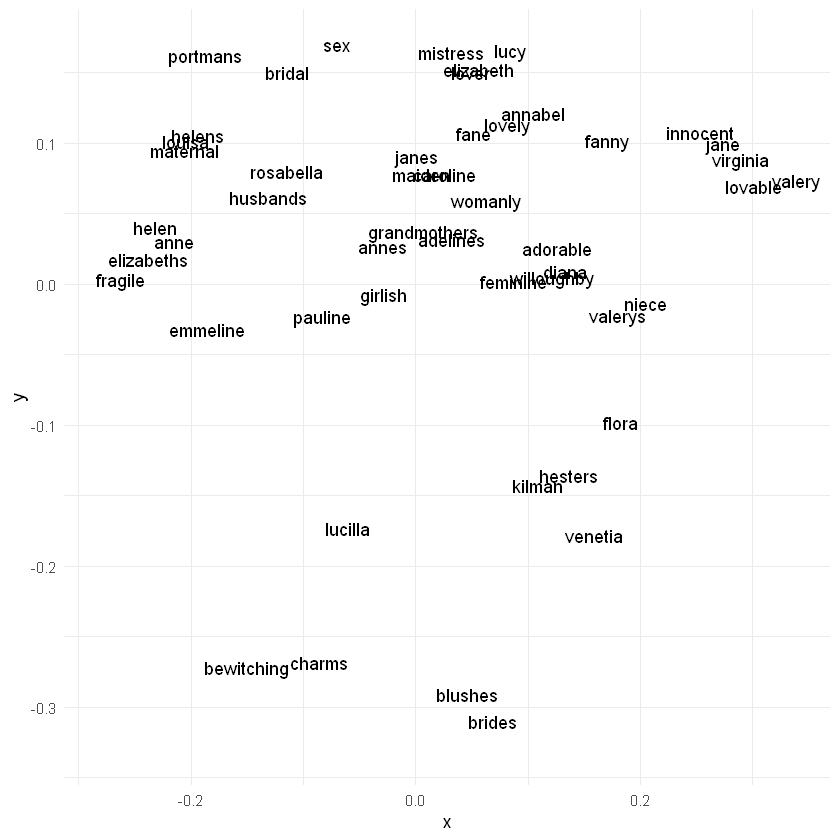

In [ ]:
plot_data <- data.frame(x = mds[, 1], y = mds[, 2], label = unlist(her_tokens))


# Create the scatter plot with text labels using ggplot2
p <- ggplot(plot_data, aes(x = x, y = y, label = label)) +
  geom_point(alpha = 0) +
  geom_text(nudge_x = 0.02, nudge_y = 0.02) +
  theme_minimal()

# Print the plot
print(p)

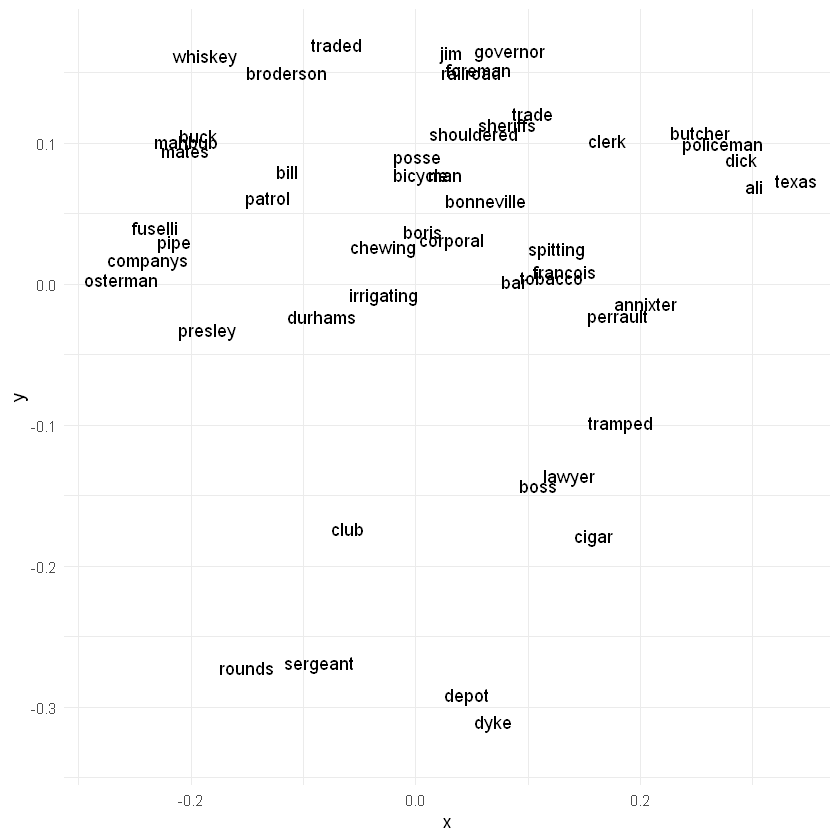

In [ ]:
# For comparison, here is the same graph using a masculine-pronoun vector

# Find most similar tokens
similarity_result <- model$wv$most_similar(negative = c("she", "her", "hers", "herself"),
                                           positive = c("he", "him", "his", "himself"),
                                           topn = as.integer(50))  # Convert to integer

his_tokens <- sapply(similarity_result, function(item) item[1])


# Get the vector for each sampled word

for (i in 1:length(his_tokens)){

    if (i == 1) { vectors_matrix <- model$wv$get_vector(i) } else {
        vectors_matrix <- rbind(vectors_matrix, model$wv$get_vector(i))
    }

}

dist_matrix <- as.matrix(proxy::dist(vectors_matrix, by_rows = TRUE, method = "cosine"))

mds <- cmdscale(dist_matrix, k = 2)

plot_data <- data.frame(x = mds[, 1], y = mds[, 2], label = unlist(his_tokens))

# Create the scatter plot with text labels using ggplot2
p <- ggplot(plot_data, aes(x = x, y = y, label = label)) +
  geom_point(alpha = 0) +
  geom_text(nudge_x = 0.02, nudge_y = 0.02) +
  theme_minimal()

# Print the plot
print(p)

> ### <span style="color:#CC7A00" > **Questions:** </p>
> <span style="color:#CC7A00" > What kinds of semantic relationships exist in the diagram above? </p>
> <span style="color:#CC7A00" > Are there any words that seem out of place?
</span>

## 3. Saving/Loading Models

In [ ]:
# Save current model for later use

model$wv$save_word2vec_format('resources/word2vec.txtlab_Novel150_English.txt')


In [ ]:
# Load up models from disk

# Model trained on Eighteenth Century Collections Online corpus (~2500 texts)
# Made available by Ryan Heuser: http://ryanheuser.org/word-vectors-1/

ecco_model <- gensim$models$KeyedVectors$load_word2vec_format('resources/word2vec.ECCO-TCP.txt')


In [ ]:
# What are similar words to BANK?

ecco_model$most_similar('bank')

[[1]]
[[1]][[1]]
[1] "ground"

[[1]][[2]]
[1] 0.6570007


[[2]]
[[2]][[1]]
[1] "turf"

[[2]][[2]]
[1] 0.6564097


[[3]]
[[3]][[1]]
[1] "surface"

[[3]][[2]]
[1] 0.6480725


[[4]]
[[4]][[1]]
[1] "declivity"

[[4]][[2]]
[1] 0.6424208


[[5]]
[[5]][[1]]
[1] "hill"

[[5]][[2]]
[1] 0.6371115


[[6]]
[[6]][[1]]
[1] "bridge"

[[6]][[2]]
[1] 0.6332241


[[7]]
[[7]][[1]]
[1] "terrace"

[[7]][[2]]
[1] 0.6301186


[[8]]
[[8]][[1]]
[1] "channel"

[[8]][[2]]
[1] 0.6295771


[[9]]
[[9]][[1]]
[1] "banks"

[[9]][[2]]
[1] 0.6294739


[[10]]
[[10]][[1]]
[1] "wall"

[[10]][[2]]
[1] 0.6289104

In [ ]:
# What if we remove the sense of "river bank"?
ecco_model$most_similar(positive = list('bank'), negative = list('river'))

[[1]]
[[1]][[1]]
[1] "currency"

[[1]][[2]]
[1] 0.3671426


[[2]]
[[2]][[1]]
[1] "suit"

[[2]][[2]]
[1] 0.359229


[[3]]
[[3]][[1]]
[1] "stamp"

[[3]][[2]]
[1] 0.3582038


[[4]]
[[4]][[1]]
[1] "promissory"

[[4]][[2]]
[1] 0.3560531


[[5]]
[[5]][[1]]
[1] "pension"

[[5]][[2]]
[1] 0.3518322


[[6]]
[[6]][[1]]
[1] "blank"

[[6]][[2]]
[1] 0.3518178


[[7]]
[[7]][[1]]
[1] "payable"

[[7]][[2]]
[1] 0.342705


[[8]]
[[8]][[1]]
[1] "mortality"

[[8]][[2]]
[1] 0.3426246


[[9]]
[[9]][[1]]
[1] "weekly"

[[9]][[2]]
[1] 0.340806


[[10]]
[[10]][[1]]
[1] "weal"

[[10]][[2]]
[1] 0.330936

## Exercises!

See if you can attempt the following exercises on your own!

In [ ]:
## EX. Use the most_similar method to find the tokens nearest to 'car' in either model.
##     Do the same for 'motorcar'.

## Q.  What characterizes these two words inthe corpus? Does this make sense?

model$wv$most_similar("car")

[[1]]
[[1]][[1]]
[1] "hansom"

[[1]][[2]]
[1] 0.7500697


[[2]]
[[2]][[1]]
[1] "taxi"

[[2]][[2]]
[1] 0.7478841


[[3]]
[[3]][[1]]
[1] "cars"

[[3]][[2]]
[1] 0.7394878


[[4]]
[[4]][[1]]
[1] "buggy"

[[4]][[2]]
[1] 0.7370667


[[5]]
[[5]][[1]]
[1] "wagon"

[[5]][[2]]
[1] 0.7363459


[[6]]
[[6]][[1]]
[1] "motor"

[[6]][[2]]
[1] 0.7324641


[[7]]
[[7]][[1]]
[1] "omnibus"

[[7]][[2]]
[1] 0.7272355


[[8]]
[[8]][[1]]
[1] "bus"

[[8]][[2]]
[1] 0.7186579


[[9]]
[[9]][[1]]
[1] "cab"

[[9]][[2]]
[1] 0.7113178


[[10]]
[[10]][[1]]
[1] "sled"

[[10]][[2]]
[1] 0.7040994

In [ ]:
model$wv$most_similar('motorcar')

[[1]]
[[1]][[1]]
[1] "haha"

[[1]][[2]]
[1] 0.7878644


[[2]]
[[2]][[1]]
[1] "laundry"

[[2]][[2]]
[1] 0.7624445


[[3]]
[[3]][[1]]
[1] "hoop"

[[3]][[2]]
[1] 0.7621448


[[4]]
[[4]][[1]]
[1] "hallway"

[[4]][[2]]
[1] 0.7472834


[[5]]
[[5]][[1]]
[1] "taxi"

[[5]][[2]]
[1] 0.7455682


[[6]]
[[6]][[1]]
[1] "slowed"

[[6]][[2]]
[1] 0.7431114


[[7]]
[[7]][[1]]
[1] "broom"

[[7]][[2]]
[1] 0.7404183


[[8]]
[[8]][[1]]
[1] "latchkey"

[[8]][[2]]
[1] 0.7392966


[[9]]
[[9]][[1]]
[1] "joness"

[[9]][[2]]
[1] 0.7392609


[[10]]
[[10]][[1]]
[1] "shack"

[[10]][[2]]
[1] 0.7387081

In [ ]:
## EX. How does our model answer the analogy: MADRID is to SPAIN as PARIS is to __________

## Q.  What has our model learned about nation-states?


model$wv$most_similar(positive = c('paris', 'spain'), negative = c('madrid'))


[[1]]
[[1]][[1]]
[1] "france"

[[1]][[2]]
[1] 0.7266117


[[2]]
[[2]][[1]]
[1] "europe"

[[2]][[2]]
[1] 0.7035207


[[3]]
[[3]][[1]]
[1] "england"

[[3]][[2]]
[1] 0.6902426


[[4]]
[[4]][[1]]
[1] "rome"

[[4]][[2]]
[1] 0.6846191


[[5]]
[[5]][[1]]
[1] "italy"

[[5]][[2]]
[1] 0.6807969


[[6]]
[[6]][[1]]
[1] "germany"

[[6]][[2]]
[1] 0.6742438


[[7]]
[[7]][[1]]
[1] "greece"

[[7]][[2]]
[1] 0.6369346


[[8]]
[[8]][[1]]
[1] "london"

[[8]][[2]]
[1] 0.6132418


[[9]]
[[9]][[1]]
[1] "america"

[[9]][[2]]
[1] 0.593912


[[10]]
[[10]][[1]]
[1] "india"

[[10]][[2]]
[1] 0.5838022

In [ ]:
## EX. Perform the canonic Word2Vec addition again but leave out a term:
##     Try 'king' - 'man', 'woman' - 'man', 'woman' + 'king'

## Q.  What do these indicate semantically?

model$wv$most_similar(positive = c('woman'), negative = c('man'))


[[1]]
[[1]][[1]]
[1] "maiden"

[[1]][[2]]
[1] 0.4955204


[[2]]
[[2]][[1]]
[1] "louisa"

[[2]][[2]]
[1] 0.4807178


[[3]]
[[3]][[1]]
[1] "adorable"

[[3]][[2]]
[1] 0.4782796


[[4]]
[[4]][[1]]
[1] "charms"

[[4]][[2]]
[1] 0.4661123


[[5]]
[[5]][[1]]
[1] "lover"

[[5]][[2]]
[1] 0.4660608


[[6]]
[[6]][[1]]
[1] "maid"

[[6]][[2]]
[1] 0.4493932


[[7]]
[[7]][[1]]
[1] "flora"

[[7]][[2]]
[1] 0.4470854


[[8]]
[[8]][[1]]
[1] "jane"

[[8]][[2]]
[1] 0.4470463


[[9]]
[[9]][[1]]
[1] "lucilla"

[[9]][[2]]
[1] 0.4324866


[[10]]
[[10]][[1]]
[1] "innocent"

[[10]][[2]]
[1] 0.4318191

In [ ]:
## EX. Heuser's blog post explores an analogy in eighteenth-century thought that
##     RICHES are to VIRTUE what LEARNING is to GENIUS. How true is this in
##     the ECCO-trained Word2Vec model? Is it true in the one we trained?

##  Q. How might we compare word2vec models more generally?


In [ ]:
# ECCO model: RICHES are to VIRTUE what LEARNING is to ??

ecco_model$most_similar(positive = c('learning', 'virtue'), negative = c('riches'))

[[1]]
[[1]][[1]]
[1] "piety"

[[1]][[2]]
[1] 0.7372761


[[2]]
[[2]][[1]]
[1] "morality"

[[2]][[2]]
[1] 0.7266901


[[3]]
[[3]][[1]]
[1] "science"

[[3]][[2]]
[1] 0.697471


[[4]]
[[4]][[1]]
[1] "prudence"

[[4]][[2]]
[1] 0.6855395


[[5]]
[[5]][[1]]
[1] "philosophy"

[[5]][[2]]
[1] 0.6830792


[[6]]
[[6]][[1]]
[1] "wisdom"

[[6]][[2]]
[1] 0.6511392


[[7]]
[[7]][[1]]
[1] "genius"

[[7]][[2]]
[1] 0.650582


[[8]]
[[8]][[1]]
[1] "humanity"

[[8]][[2]]
[1] 0.6402835


[[9]]
[[9]][[1]]
[1] "modesty"

[[9]][[2]]
[1] 0.6369403


[[10]]
[[10]][[1]]
[1] "morals"

[[10]][[2]]
[1] 0.63406

In [ ]:
# txtLab model: RICHES are to VIRTUE what LEARNING is to ??
model$wv$most_similar(positive = c('learning', 'virtue'), negative = c('riches'))


[[1]]
[[1]][[1]]
[1] "teaching"

[[1]][[2]]
[1] 0.5970187


[[2]]
[[2]][[1]]
[1] "mathematics"

[[2]][[2]]
[1] 0.5865543


[[3]]
[[3]][[1]]
[1] "chemistry"

[[3]][[2]]
[1] 0.5711619


[[4]]
[[4]][[1]]
[1] "poetry"

[[4]][[2]]
[1] 0.5596555


[[5]]
[[5]][[1]]
[1] "precept"

[[5]][[2]]
[1] 0.54389


[[6]]
[[6]][[1]]
[1] "believer"

[[6]][[2]]
[1] 0.5431546


[[7]]
[[7]][[1]]
[1] "deficient"

[[7]][[2]]
[1] 0.5400427


[[8]]
[[8]][[1]]
[1] "poetical"

[[8]][[2]]
[1] 0.5400041


[[9]]
[[9]][[1]]
[1] "virgil"

[[9]][[2]]
[1] 0.5367879


[[10]]
[[10]][[1]]
[1] "yankee"

[[10]][[2]]
[1] 0.5292308

## Concluding Remarks and Resources
Throughout this notebook we have seen how a number of mathematical operations can be used to explore word2vec's word embeddings. Hopefully this notebook has allowed you to see how the inherent biases of language become coded into word embeddings and systems that use word embeddings cannot be treated as search engines.

While getting inside the technics of these computational processes can enable us to answer a set of new, interesting questions dealing with semantics, there are many other questions that remain unanswered.

For example:
* Many language models are built using text from large, online corpora (such as Wikipedia, which is known to have a contributor basis that is majority white, college-educated men) - what kind of impact might this have on a language model?
* What barriers to the healthy functioning of democracy are created by the widespread use of these tools and technologies in society?
* How might language models challenge or renegotiate ideas around copyright, intellectual property and conceptions of authorship more broadly?
* What might guardrails look like for the safe and equitable management and deployment of language models?

## Resources
* [UBC Library Generative AI Research Guide](https://guides.library.ubc.ca/GenAI/home)
* ... other UBC resources...
* [What Is ChatGPT Doing … and Why Does It Work?](https://writings.stephenwolfram.com/2023/02/what-is-chatgpt-doing-and-why-does-it-work/) by Stephen Wolfram

## References
This notebook has been built using the following materials:
- Arseniev-Koehler, A., & Foster, J. G. (2020). Sociolinguistic Properties of Word Embeddings [Preprint]. SocArXiv. https://doi.org/10.31235/osf.io/b8kud
- Schiffers, R., Kern, D., & Hienert, D. (2023). Evaluation of Word Embeddings for the Social Sciences (arXiv:2302.06174). arXiv. http://arxiv.org/abs/2302.06174

- [TensorFlow word2vec tutorial](https://www.tensorflow.org/text/tutorials/word2vec)

- Anwla, P. K. (2019, October 22). Challenges in word2vec Model. TowardsMachineLearning. https://towardsmachinelearning.org/performance-problems-in-word2vec-model/

- Chandran, S. (2021, November 16). Introduction to Text Representations for Language Processing—Part 2. Medium. https://towardsdatascience.com/introduction-to-text-representations-for-language-processing-part-2-54fe6907868

